In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Preprocessing

### Exploring Data

In [11]:
# Loading and reading the dataset
df = pd.read_csv('zomato_res_final.csv')

In [12]:
df.head()

,Additional_outlet_count,Call,Cost_for_two(Rs.),Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Min_Order(Rs.),Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
0,1.0,True,1500,"Finger Food, Continental, European, Italian","Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,NaN,NaN,4.9,1326,Excellent,True,4,2,2,19.0,48.000806
1,1.0,True,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,True,NaN,NaN,4.6,5974,Excellent,True,1,2,1,209.0,71.950295
2,NaN,True,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",True,NaN,NaN,4.5,1438,Excellent,False,1,2,2,241.0,43.160370
3,NaN,True,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",True,NaN,NaN,4.9,3275,Excellent,True,2,3,2,125.0,59.778427
4,2.0,True,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,True,0.0,45.0,4.1,1422,Very Good,False,4,1,1,116.0,37.546442


In [13]:
df.shape

(6526, 22)

#### Our dataset has 22 features. Let's find out more about these features using the info( ) function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6526 entries, 0 to 6525
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Additional_outlet_count     935 non-null    float64
 1   Call                        6526 non-null   bool   
 2   Cost_for_two(Rs.)           6526 non-null   int64  
 3   Cuisines                    6525 non-null   object 
 4   Features                    1480 non-null   object 
 5   Home_Delivery               6526 non-null   bool   
 6   Operational_hours           6518 non-null   object 
 7   Restaurant_Location         6511 non-null   object 
 8   Restaurant_Name             6526 non-null   object 
 9   Restaurant_Type             5961 non-null   object 
 10  View_Menu                   6526 non-null   bool   
 11  Min_Order(Rs.)              2367 non-null   float64
 12  Delivery_Time(mins)         2367 non-null   float64
 13  Rating                      6526 

#### We have many interesting features which can be great for analysis and also some which we will omit. The difference in count of some features gives us hint of some missing values. While info( ) is used to know about count, null and type properties, describe( ) gives us statistical information about numerical data.

In [14]:
df.describe()

,Additional_outlet_count,Cost_for_two(Rs.),Min_Order(Rs.),Delivery_Time(mins),Rating,Votes,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
count,935.000000,6526.000000,2367.000000,2367.000000,6526.000000,6526.000000,6526.000000,6526.000000,6526.000000,6511.000000,6526.000000
mean,4.644920,650.581060,79.310942,45.704267,3.640316,266.182807,2.786546,1.057156,1.080754,119.808478,24.221475
std,13.748744,714.448288,53.067714,29.948286,0.395302,514.762670,1.583713,0.312616,0.272478,98.076423,7.413324
min,1.000000,50.000000,0.000000,20.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.057508
25%,1.000000,350.000000,99.000000,45.000000,3.400000,34.000000,2.000000,1.000000,1.000000,45.000000,19.527889
50%,1.000000,500.000000,99.000000,45.000000,3.600000,95.000000,2.000000,1.000000,1.000000,91.000000,23.635606
75%,3.000000,700.000000,99.000000,45.000000,3.900000,268.750000,4.000000,1.000000,1.000000,148.000000,28.035622
max,262.000000,30000.000000,500.000000,1440.000000,4.900000,9931.000000,8.000000,6.000000,2.000000,386.000000,90.344828


### Removing duplicates

#### Its important to remove duplicate rows to avoid biasness in our analysis.

In [16]:
df.drop_duplicates(["Score"],keep='first',inplace=True)
df.shape

(3399, 22)

In [48]:
#Missing Values
df.isna().sum()

Additional_outlet_count       5591
Call                             0
Cost_for_two(Rs.)                0
Cuisines                         1
Features                      5046
Home_Delivery                    0
Operational_hours                8
Restaurant_Location             15
Restaurant_Name                  0
Restaurant_Type                565
View_Menu                        0
Min_Order(Rs.)                4159
Delivery_Time(mins)           4159
Rating                           0
Votes                            0
Rating_Category                  0
Operational_after_Midnight       0
Cuisine_count                    0
Feature_Count                    0
Res_Type_Count                   0
Competitors_in_Location         15
Score                            0
dtype: int64

In [49]:
# Changing the columns name
df=df.rename(columns={'Cost_for_two(Rs.)':'Cost','Home_Delivery':'Online_Delivery'})
df.columns

Index(['Additional_outlet_count', 'Call', 'Cost', 'Cuisines', 'Features',
       'Online_Delivery', 'Operational_hours', 'Restaurant_Location',
       'Restaurant_Name', 'Restaurant_Type', 'View_Menu', 'Min_Order(Rs.)',
       'Delivery_Time(mins)', 'Rating', 'Votes', 'Rating_Category',
       'Operational_after_Midnight', 'Cuisine_count', 'Feature_Count',
       'Res_Type_Count', 'Competitors_in_Location', 'Score'],
      dtype='object')

In [71]:
#Replacing zero
df['Min_Order(Rs.)'] = df['Min_Order(Rs.)'].fillna(99)
df['Min_Order(Rs.)'] = df['Min_Order(Rs.)'].replace(0,99) 
df.head()

,Additional_outlet_count,Call,Cost_for_two(Rs.),Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Min_Order(Rs.),Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
0,1.0,True,1500,"Finger Food, Continental, European, Italian","Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,99.0,NaN,4.9,1326,Excellent,True,4,2,2,19.0,48.000806
1,1.0,True,800,Pizza,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,True,99.0,NaN,4.6,5974,Excellent,True,1,2,1,209.0,71.950295
2,NaN,True,2500,Seafood,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",Bandra West,Bastian,"Casual Dining,Bar",True,99.0,NaN,4.5,1438,Excellent,False,1,2,2,241.0,43.160370
3,NaN,True,1800,"Finger Food, Continental","Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",True,99.0,NaN,4.9,3275,Excellent,True,2,3,2,125.0,59.778427
4,2.0,True,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,True,99.0,45.0,4.1,1422,Very Good,False,4,1,1,116.0,37.546442


In [76]:
#Replacing Nan with mean 
df['Delivery_Time(mins)'].fillna((df['Delivery_Time(mins)'].mean()), inplace=True)
df.head()

,Additional_outlet_count,Call,Cost_for_two(Rs.),Cuisines,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Min_Order(Rs.),Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
4,2.0,True,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,True,99.0,45.000000,4.1,1422,Very Good,False,4,1,1,116.0,37.546442
11,NaN,True,600,"Chinese, North Indian, Biryani","Value For Money, Trending This Week",True,11am – 12:45AM (Mon-Sun),Andheri West,Cafe Safar,Casual Dining,True,99.0,45.000000,3.9,2107,Good,True,3,2,1,295.0,38.927211
19,NaN,True,1500,"North Indian, Mughlai, South Indian","Best of Mumbai, Food Hygiene Rated Restaurants...",False,"12:30pm – 3:30pm, 6:30pm – 11pm (Mon-Sun)",Powai,Mirchi And Mime,Casual Dining,True,99.0,45.704267,4.9,5508,Excellent,False,3,2,1,134.0,73.272233
21,5.0,True,1500,"North Indian, Mughlai, Chinese",NaN,True,"12noon – 3:30pm, 6pm – 12midnight (Mon-Sun)",Powai,Mini Punjab's Lake Side,Casual Dining,True,99.0,40.000000,3.9,1825,Good,False,3,1,1,134.0,37.223112
28,NaN,True,650,"Mughlai, Fast Food, North Indian, Chinese, Pizza",Legendary Outlets,True,12noon – 12:45AM (Mon-Sun),Andheri West,Yasin's Food Inn,Casual Dining,True,99.0,70.000000,3.9,2820,Good,True,5,1,1,295.0,43.235802


# 1. Restaurant delivering Online or not

Text(0.5, 1.0, 'Restaurant delivering online or not')

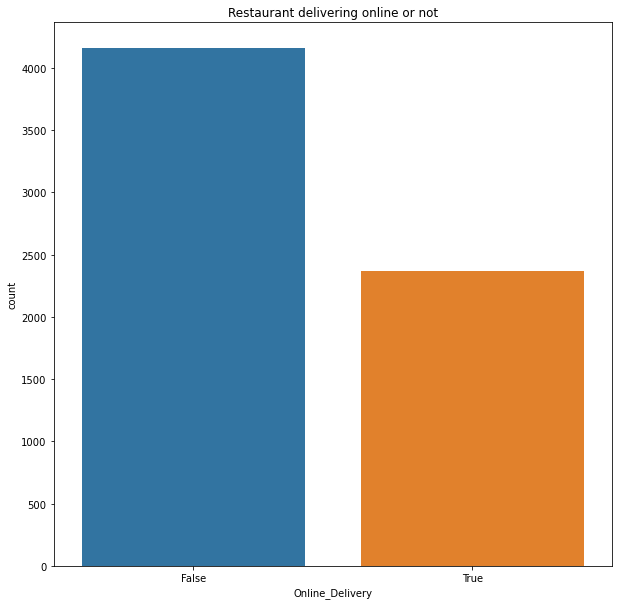

In [52]:
sns.countplot(df['Online_Delivery'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurant delivering online or not')

## 1.Which are the top restaurant chains of Mumbai

Text(0.5, 0, 'Number of outlets')

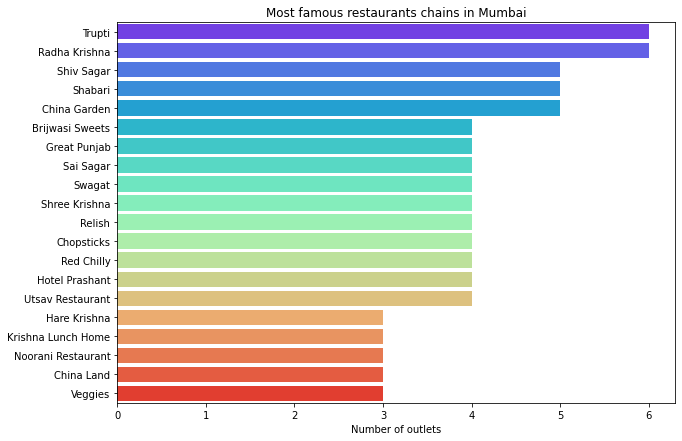

In [53]:
plt.figure(figsize=(10,7))
chains=df['Restaurant_Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='rainbow')
plt.title("Most famous restaurants chains in Mumbai")
plt.xlabel("Number of outlets")

## 2. No of restaurants in a location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

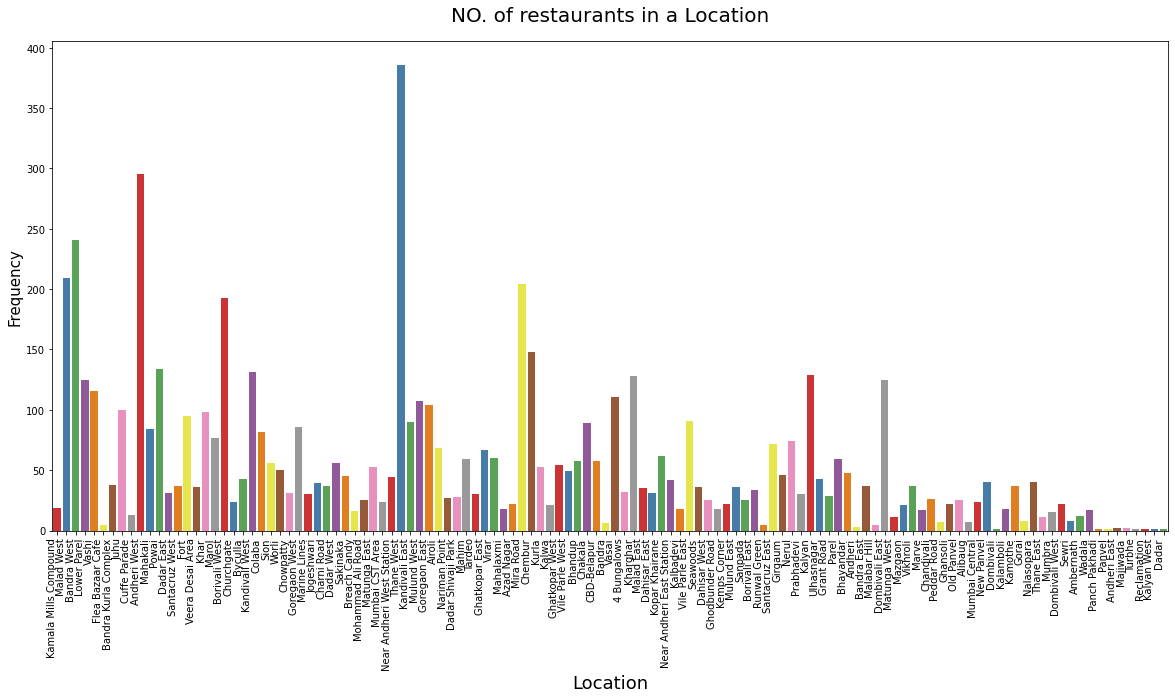

In [54]:
#NO. of restaurants in a Location',
fig = plt.figure(figsize=(20,9))
loc = sns.countplot(x="Restaurant_Location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

## 3. Count of restaurants at unique locations

In [55]:
print("Count of restaurants at unique locations")
locationCount=df['Restaurant_Location'].value_counts().sort_values(ascending=True)
locationCount


Count of restaurants at unique locations


Turbhe                         1
Panch Pakhadi                  1
Kalyan West                    1
Dombivali                      1
Reclamation                    1
Dadar                          1
Panvel                         1
Majiwada                       2
Andheri East                   2
Andheri                        3
Malabar Hill                   5
Flea Bazaar Café               5
Runwal Green                   5
Bandra                         6
Alibaug                        7
Peddar Road                    7
Sewri                          8
Gorai                          8
Thane East                    11
Matunga West                  11
Ambernath                     12
Cuffe Parade                  13
Mumbra                        15
Breach Candy                  16
Wadala                        17
Marve                         17
Kalamboli                     18
Ghodbunder Road               18
Mahalaxmi                     18
Kalbadevi                     18
Kamala Mil

## 4. Restaurant type

Text(0.5, 1.0, 'Restuarants Type')

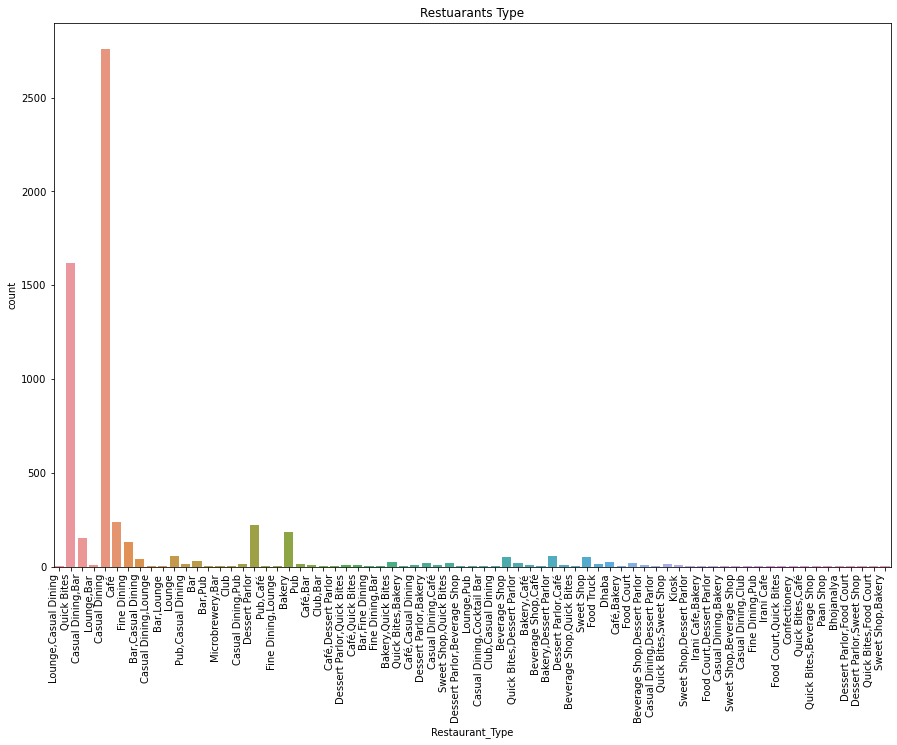

In [56]:
#Restaurant Type
sns.countplot(df['Restaurant_Type'])
sns.countplot(df['Restaurant_Type']).set_xticklabels(sns.countplot(df['Restaurant_Type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Restuarants Type')


## 5. Cost Of Restaurant

Text(0.5, 1.0, 'Cost of Restuarant')

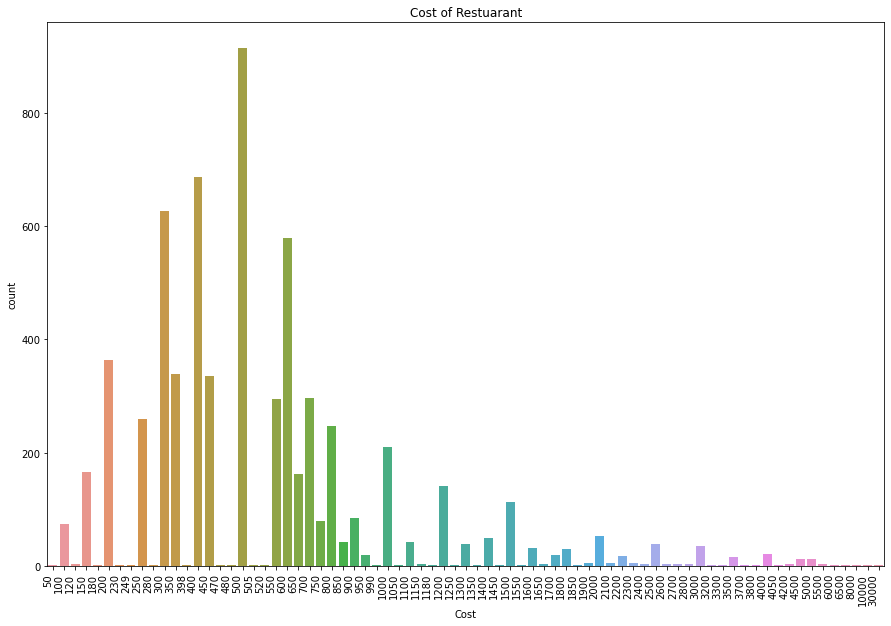

In [57]:
#Cost of two in Restuarant
sns.countplot(df['Cost'])
sns.countplot(df['Cost']).set_xticklabels(sns.countplot(df['Cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Cost of Restuarant')


## 6. Get All the North Indian Food Serving Restaurants

In [58]:
NorthIndianFoodRestaurants = df[df['Cuisines'].str.contains('North Indian', case=False, regex=True,na=False)]
NorthIndianFoodRestaurants.head()

,Additional_outlet_count,Call,Cost,Cuisines,Features,Online_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Min_Order(Rs.),Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
4,2.0,True,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,True,99.0,45.000000,4.1,1422,Very Good,False,4,1,1,116.0,37.546442
11,NaN,True,600,"Chinese, North Indian, Biryani","Value For Money, Trending This Week",True,11am – 12:45AM (Mon-Sun),Andheri West,Cafe Safar,Casual Dining,True,99.0,45.000000,3.9,2107,Good,True,3,2,1,295.0,38.927211
13,34.0,True,500,"North Indian, Biryani, Sandwich, Rolls, Salad,...",30% off on your first order,True,11am – 1am (Mon-Sun),Mahakali,BOX8- Desi Meals,NaN,True,99.0,38.000000,4.1,1053,Very Good,True,6,1,1,84.0,35.316610
15,NaN,True,1000,"North Indian, Chinese, Continental, American","Live Sports Screenings, Best of Mumbai",False,11:30am – 1am (Mon-Sun),Bandra Kurla Complex,BKC | DIVE.,"Bar,Casual Dining",True,99.0,45.704267,4.7,4145,Excellent,True,4,2,2,38.0,62.277133
16,2.0,True,1600,"North Indian, Italian, Chinese, Continental, B...",Rooftops,False,11:30am – 12:30AM (Mon-Sun),Powai,Rude Lounge,"Casual Dining,Lounge",True,99.0,45.704267,4.0,3823,Very Good,True,8,1,2,134.0,50.676145


## 7. Get All the Chinese Food Serving Restaurants

In [59]:
ChineseFoodRestaurants = df[df['Cuisines'].str.contains('Chinese|Momos', case=False, regex=True,na=False)]
ChineseFoodRestaurants.head()

,Additional_outlet_count,Call,Cost,Cuisines,Features,Online_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Min_Order(Rs.),Delivery_Time(mins),Rating,Votes,Rating_Category,Operational_after_Midnight,Cuisine_count,Feature_Count,Res_Type_Count,Competitors_in_Location,Score
4,2.0,True,450,"North Indian, Street Food, Fast Food, Chinese",NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,True,99.0,45.000000,4.1,1422,Very Good,False,4,1,1,116.0,37.546442
6,NaN,True,800,"American, Asian, Street Food, Indian, Lucknowi...",NaN,True,12noon – 1am (Mon-Sun),Flea Bazaar Café,Flea Bazaar Café,Café,True,99.0,30.000000,4.4,1424,Very Good,True,8,1,1,5.0,41.696459
8,NaN,True,2800,"Asian, Cantonese, Chinese, Tea, Yum Cha",Best of Mumbai,False,12noon – 1am (Mon-Sun),Bandra Kurla Complex,Yauatcha,Fine Dining,True,99.0,45.704267,4.7,4752,Excellent,True,5,1,1,38.0,65.945176
11,NaN,True,600,"Chinese, North Indian, Biryani","Value For Money, Trending This Week",True,11am – 12:45AM (Mon-Sun),Andheri West,Cafe Safar,Casual Dining,True,99.0,45.000000,3.9,2107,Good,True,3,2,1,295.0,38.927211
15,NaN,True,1000,"North Indian, Chinese, Continental, American","Live Sports Screenings, Best of Mumbai",False,11:30am – 1am (Mon-Sun),Bandra Kurla Complex,BKC | DIVE.,"Bar,Casual Dining",True,99.0,45.704267,4.7,4145,Excellent,True,4,2,2,38.0,62.277133


## 8.Analysis of Restaurants based on their Ratings

In [60]:
print("All unique restaurants ratings:")
df.Rating.unique()

All unique restaurants ratings:


array([4.9, 4.6, 4.5, 4.1, 4.8, 4.4, 4.7, 3.9, 4. , 4.2, 4.3, 3.8, 3.7,
       3.6, 3.4, 3.5, 2.9, 3.1, 3.3, 2.7, 3.2, 2.8, 2.4, 3. , 2.1, 2.6,
       2.5, 2.3, 2. , 2.2])

In [61]:
print("No. of restaurants between 1.0 and 2 rating:")
((df.Rating>=1.0) & (df.Rating<2.0)).sum()

No. of restaurants between 1.0 and 2 rating:


0

In [62]:
print("No. of restaurants between 2.0 and 3.0 rating:")
((df.Rating>=2.0) & (df.Rating<3.0)).sum()

No. of restaurants between 2.0 and 3.0 rating:


340

In [63]:
print("No. of restaurants between 3.0 and 4.0 rating:")
((df.Rating>=3.0) & (df.Rating<4.0)).sum()

No. of restaurants between 3.0 and 4.0 rating:


4873

In [64]:
print("No. of restaurants between 4.0 and 5.0 rating:")
((df.Rating>=4.0) & (df.Rating<5.0)).sum()

No. of restaurants between 4.0 and 5.0 rating:


1313

In [65]:
#Removing the categorical columns
df=df.drop(['Call','Online_Delivery','View_Menu'],axis=1)

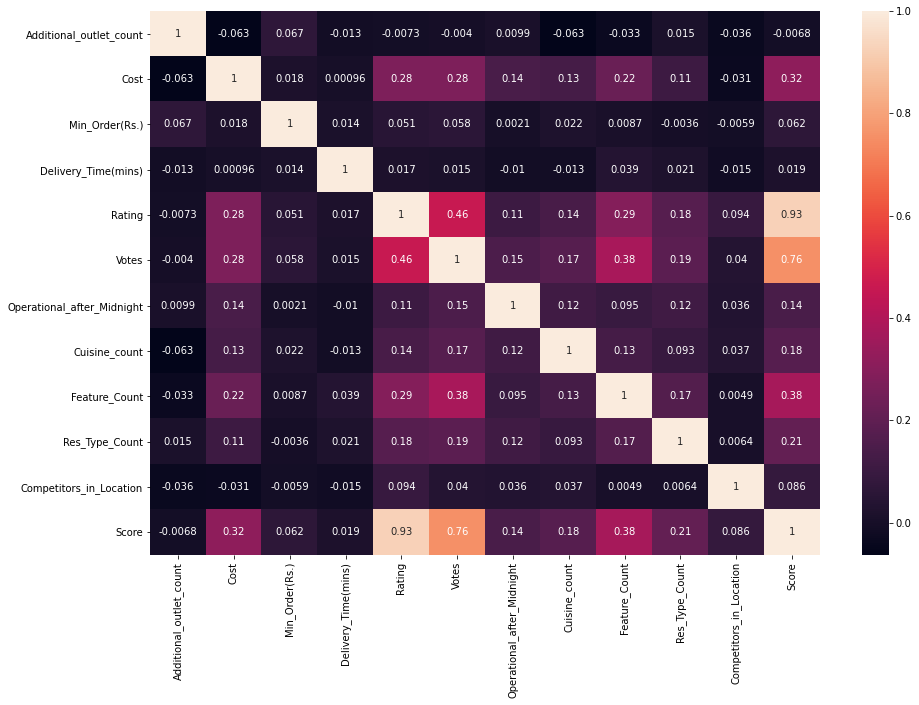

In [66]:
#Correlation between two variables
corr=df.corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

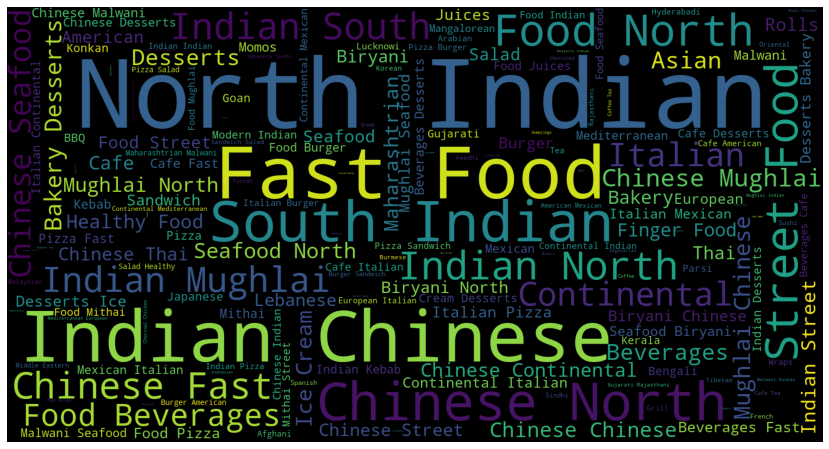

In [10]:
#This is an example of Casual Dining!
#df= df[df['Restaurant_Type'] == 'Casual Dining']
#df.head()
words = list(df['Cuisines'])
word_cloud = []
for i in words:
    if(type(i) == str):
        temp = i.split(',')
        for i in temp:
            i=" ".join(i.split())
            word_cloud.append(i)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(word_cloud)
wordcloud = WordCloud(width = 1500, height =800).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()